In [1]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import seaborn as sns
from simulation.models.single_codon import single_codon
from matplotlib import rcParams
%matplotlib inline

In [2]:
def read_sim(path_pref, seed_start=1, seed_end=3, seed_incr=1):
    """ 
    Reads in output for an arbitrary number of simulation trials 
    (with different seeds) and concatenates results into a single
    dataset.
    """
    df_master = pd.read_csv(f"{path_pref}_{seed_start}.tsv", sep="\t")
    df_master["seed"] = str(seed_start)
    for i in range(seed_start+1, seed_end+1):
        tmp = pd.read_csv(f"{path_pref}_{i}.tsv", sep="\t")
        tmp["seed"] = str(i)
        df_master = df_master.append(tmp, ignore_index=True)
    return df_master

def tRNA_species_plot(df):
    df_fil = df[(df.species == "TTT_charged") | (df.species == "TTT_uncharged")]
    sns.lineplot(x="time", y="protein", units="seed", hue="species", estimator=None, data=df_fil)
    
def ribosome_plot(df):
    df_fil = df[(df.species == "__ribosome")]
    sns.lineplot(x="time", y="protein", units="seed", estimator=None, data=df_fil, color="g")

In [4]:
rcParams['figure.figsize'] = [10, 5]

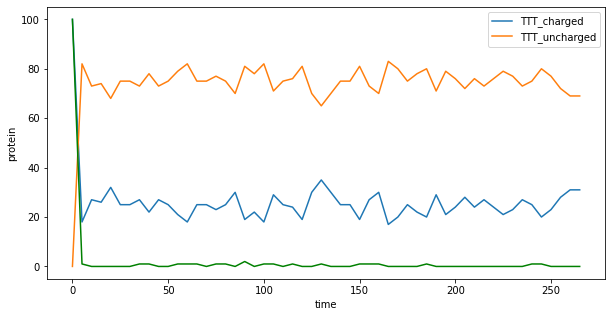

In [5]:
df_master = read_sim("../output/test/fixed_transcript_400_100.0", 1, 1, 1)
tRNA_species_plot(df_master)
ribosome_plot(df_master)